In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits() #gets the bunch

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

2


<Figure size 640x480 with 0 Axes>

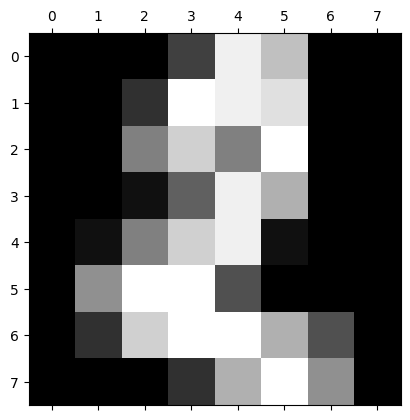

In [24]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[2])
print(digits.target[2])       #so the below image is a 2

/tmp/ipython-input-3770319432.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('tab10', 10))


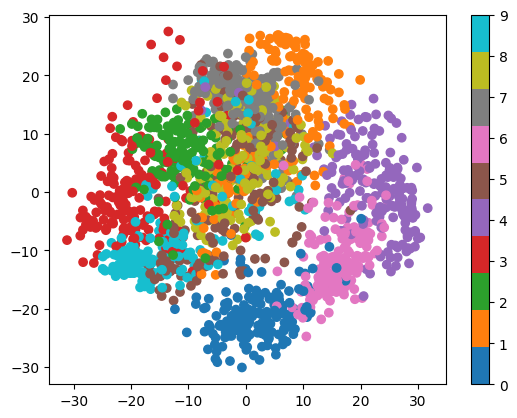

In [25]:
from sklearn.decomposition import PCA
X, y = digits.data, digits.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar()
plt.show()


We have 64 features for each digit image one feature per pixel. That’s way too many to plot directly, so we use a technique called PCA. PCA takes those 64 features and finds two new features that capture the biggest patterns in the data. This lets us compress the dataset into 2D so we can draw a scatter plot.

The colors in the plot represent the actual digit labels (0–9). If we see that same colored points group together in clusters, it means digits are already somewhat separated in this 2D projection, and probably even more separable in the full 64-D space. That’s why an algorithm like SVM can work well here.

##Training


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [28]:
model= SVC()
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=42)
model.fit(x_train,y_train)

SVC()

In [35]:
model.score(x_test,y_test)

0.9861111111111112

##Important way to structure hyperparameter tuning, to later analyse which ones give the most favourable result


In [37]:
C_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]
kernels = ['rbf', 'linear']


results = []
for kernel in kernels:
    for C in C_values:
        if kernel == 'rbf':  # gamma only matters for rbf
            for gamma in gamma_values:
                clf = SVC(kernel=kernel, C=C, gamma=gamma)
                clf.fit(x_train, y_train)
                train_score = clf.score(x_train, y_train)
                test_score = clf.score(x_test, y_test)
                results.append((kernel, C, gamma, train_score, test_score))
        else:
            clf = SVC(kernel=kernel, C=C)
            clf.fit(x_train, y_train)
            train_score = clf.score(x_train, y_train)
            test_score = clf.score(x_test, y_test)
            results.append((kernel, C, None, train_score, test_score))


print(f"{'Kernel':<8} {'C':<6} {'Gamma':<6} {'Train':<8} {'Test':<8}")
for r in results:
    print(f"{r[0]:<8} {r[1]:<6} {str(r[2]):<6} {r[3]:<8.3f} {r[4]:<8.3f}")

Kernel   C      Gamma  Train    Test    
rbf      0.1    0.001  0.973    0.967   
rbf      0.1    0.01   0.107    0.078   
rbf      0.1    0.1    0.107    0.078   
rbf      0.1    1      0.107    0.078   
rbf      1      0.001  0.998    0.989   
rbf      1      0.01   1.000    0.792   
rbf      1      0.1    1.000    0.078   
rbf      1      1      1.000    0.078   
rbf      10     0.001  1.000    0.989   
rbf      10     0.01   1.000    0.814   
rbf      10     0.1    1.000    0.078   
rbf      10     1      1.000    0.078   
rbf      100    0.001  1.000    0.989   
rbf      100    0.01   1.000    0.814   
rbf      100    0.1    1.000    0.078   
rbf      100    1      1.000    0.078   
linear   0.1    None   1.000    0.978   
linear   1      None   1.000    0.978   
linear   10     None   1.000    0.978   
linear   100    None   1.000    0.978   


C (Regularization)

Small C - Strong regularization - Simpler decision boundary - May underfit (low train + low test score).

Large C - Weak regularization - More complex boundary - Risk of overfitting (train score high, test score drops).

Plateau effect - If increasing C beyond a point doesn’t improve test score, you’ve reached the “sweet spot” and higher values only risk overfit.

Gamma (RBF kernel only)

Controls influence of a single training example.

Low gamma - Broad influence - Smoother decision boundary - May miss fine patterns.

High gamma - Very localized influence - Extremely wiggly boundary - High overfit risk (train score ≈ 1.0, test score low).

Optimal gamma usually gives high test accuracy without perfect train accuracy.

Kernel

RBF - Nonlinear, can model complex boundaries.

Linear - Straight boundary, works well when features are already separable.

If linear scores match RBF, the dataset may already be linearly separable.

Signs of Underfitting

Low train and low test scores.

Often caused by low C, low gamma, or an overly simple kernel.

Signs of Overfitting

Train score near 1.0 but test score drops significantly.

Often caused by high C, high gamma, or overly complex kernel.

Goal

Find parameters where test accuracy is high and close to train accuracy.

Avoid chasing perfect train accuracy — balance is key.